<a href="https://colab.research.google.com/github/ChernovaNatalya/ScientificProgramming/blob/main/SolarActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline
import sympy
from scipy.fft import fft, fftfreq

In [3]:
# временной промежуток, на котором исследуется солнечная активность (будущая ось X)
years = np.arange(1900, 2016)
# солнечная активность в годы с 1900 по 2015 (будущая ось Y)
datas = np.array([15.7, 4.6, 8.5, 40.8, 70.1, 105.5, 90.1, 102.8, 80.9, 73.2, 30.9, 9.5, 6.0, 2.4, 16.1, 79.0, 95.0, 173.6, 134.6,
  105.7, 62.7, 43.5, 23.7, 9.7, 27.9, 74.0, 106.5, 114.7, 129.7, 108.2, 59.4, 35.1, 18.6, 9.2, 14.6, 60.2, 132.8, 190.6, 182.6, 148.0,
  113.0, 79.2, 50.8, 27.1, 16.1, 55.3, 154.3, 214.7, 193.0, 190.7, 118.9, 98.3, 45.0, 20.1, 6.6, 54.2, 200.7, 269.3, 261.7, 225.1, 159.0,
  76.4, 53.4, 39.9, 15.0, 22.0, 66.8, 132.9, 150.0, 149.4, 148.0, 94.4, 97.6, 54.1, 49.2, 22.5, 18.4, 39.3, 131.0, 220.1, 218.9,
  198.9, 162.4, 91.0, 60.5, 20.6, 14.8, 33.9, 123.0, 211.1, 191.8, 203.3, 133.0, 76.1, 44.9, 25.1, 11.6, 28.9, 88.3, 136.3, 173.9,
  170.4, 163.6, 99.3, 65.3, 45.8, 24.7, 12.6, 4.2, 4.8, 24.9, 80.8, 84.5, 94.0, 113.3, 69.8])

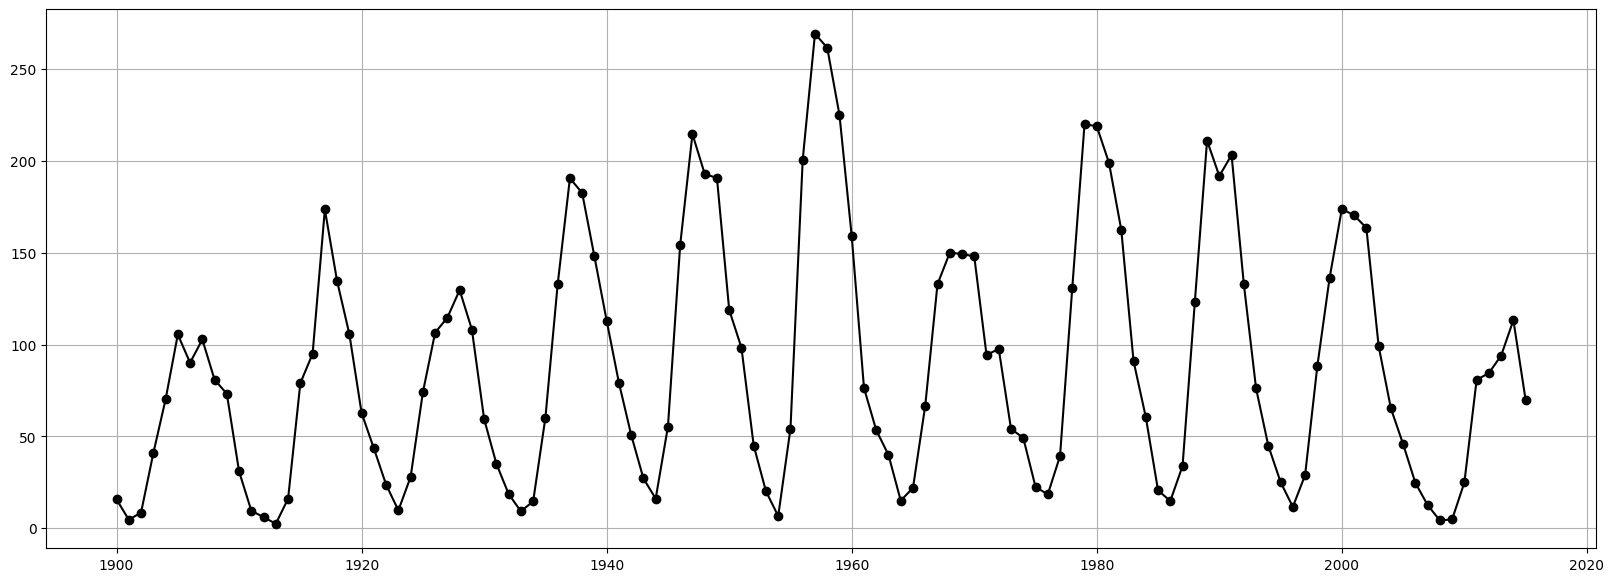

In [4]:
pp.figure(figsize=(20, 7))
pp.plot(years, datas, "ko-")
pp.grid()
pp.show()